<a href="https://colab.research.google.com/github/Priyansh-Zinzuvadia/MIS_515_Fall2023/blob/main/Kaggle2_404_Project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset
df =  pd.read_csv('/content/train.tsv.zip', sep = '\t')

df.head(5)


FileNotFoundError: ignored

In [ ]:
df.drop_duplicates(subset="SentenceId", keep="first", inplace=True)
df.head()

NameError: ignored

In [ ]:
# Checking for missing values in the dataset
print(df.shape)
df.isnull().sum()

(156060, 4)


PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
# Mapping numerical sentiment labels to human-defined sentiment phrases
Sentiment_phrase =[]

for row in df['Sentiment']:
    if row == 0:
        Sentiment_phrase.append('negative')
    elif row == 1:
        Sentiment_phrase.append('somewhat negative')
    elif row == 2:
        Sentiment_phrase.append('neutral')
    elif row == 3:
        Sentiment_phrase.append('somewhat positive')
    elif row == 4:
        Sentiment_phrase.append('positive')
    else:
        Sentiment_phrase.append('Failed')

# Adding a new column with the sentiment phrases
df['Sentiment_phrase'] = Sentiment_phrase


In [ ]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_phrase
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neutral
2,3,1,A series,2,neutral
3,4,1,A,2,neutral
4,5,1,series,2,neutral


In [ ]:
df['Sentiment'].value_counts()


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [ ]:
senti_phrase_count = pd.value_counts(df['Sentiment_phrase'].values)
senti_phrase_count

neutral              79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
dtype: int64

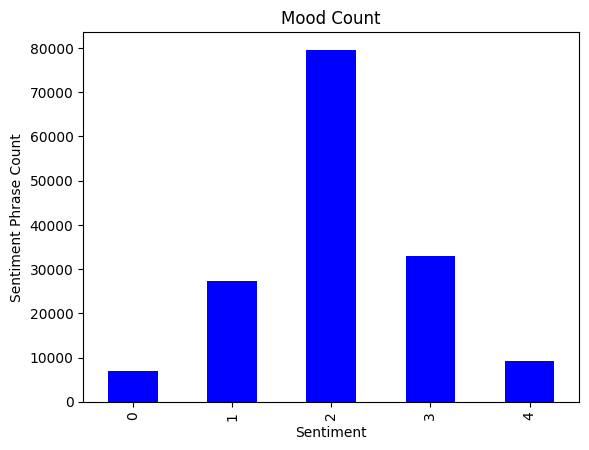

In [ ]:
df['Sentiment'].value_counts().sort_index().plot(kind='bar', color= 'blue')
plt.ylabel('Sentiment Phrase Count')
plt.xlabel('Sentiment')
plt.title('Mood Count');


In [ ]:
word_counts = df['Phrase'].apply(lambda x: len(x.split()))

word_counts.describe()
print(df['Sentiment'].value_counts(normalize=True).sort_index())


0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64


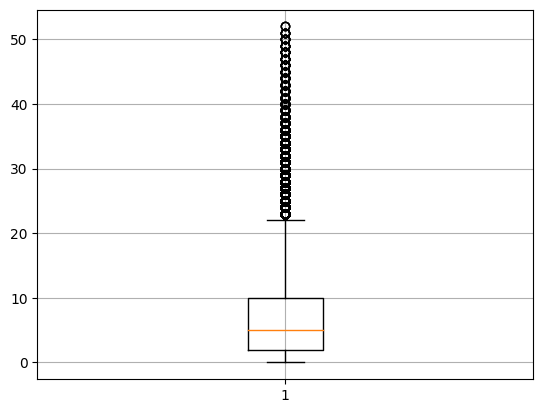

In [ ]:
plt.boxplot(word_counts.values)
plt.grid(True)
plt.show()
#Most of the reviews have words between 5 to 10

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Setting up NLTK components for text processing
stemmer  = SnowballStemmer(language='english') #setup for english language
stop_words = stopwords.words('english')
stop_words.extend(['film','movie'])
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies reviews
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function for preprocessing text data
def data_preprocess(Phrase):
  """
    Preprocesses a given movie review phrase.

    Parameters:
    - Phrase (str): The input movie review phrase.

    Returns:
    - str: The preprocessed movie review phrase.
    """
    Phrase = re.sub(re.compile('<.*?>'), '', Phrase) #removing html tags if any
    Phrase =  re.sub('[^A-Za-z0-9]+', ' ', Phrase) #taking only words
    Phrase = Phrase.lower()   # making all phrases lower case
    tokens = nltk.word_tokenize(Phrase) # converts Phrases to tokens
    Phrase = [word for word in tokens if word not in stop_words] #removing stop words
    Phrase = [lemmatizer.lemmatize(word) for word in Phrase]   # lemmatization
    Phrase = ' '.join(Phrase)  # join words in preprocessed Phrase

    return Phrase

In [ ]:
# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Applying the data_preprocess function to create a new preprocessed column
df['Preprocessed_phrase'] = df['Phrase'].apply(lambda Phrase: data_preprocess(Phrase))
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_phrase,Preprocessed_phrase
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,series escapade demonstrating adage good goose...
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,series escapade demonstrating adage good goose
2,3,1,A series,2,neutral,series
3,4,1,A,2,neutral,
4,5,1,series,2,neutral,series


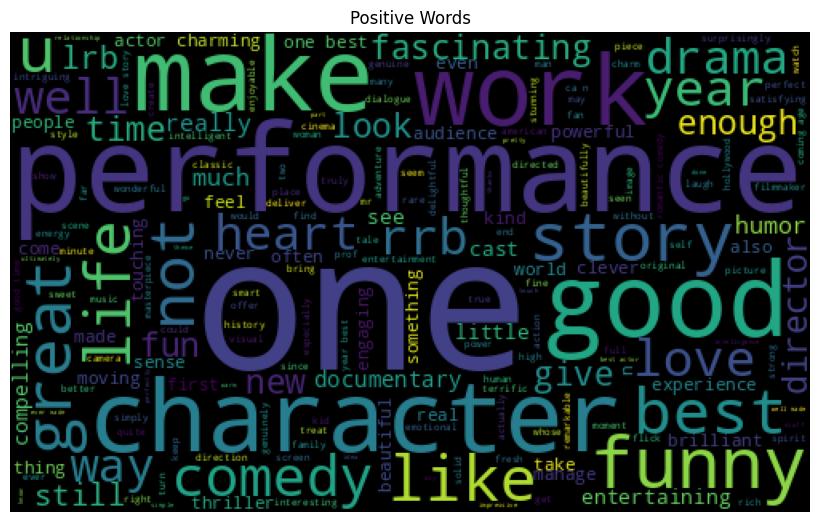

In [ ]:
# Importing WordCloud for visualizing most frequent words
from wordcloud import WordCloud

# Creating a word cloud for positive sentiment phrases
words_list = df[df['Sentiment_phrase']=='positive']['Preprocessed_phrase'].unique().tolist()
positive_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=stop_words).generate(positive_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Positive Words')
plt.show()

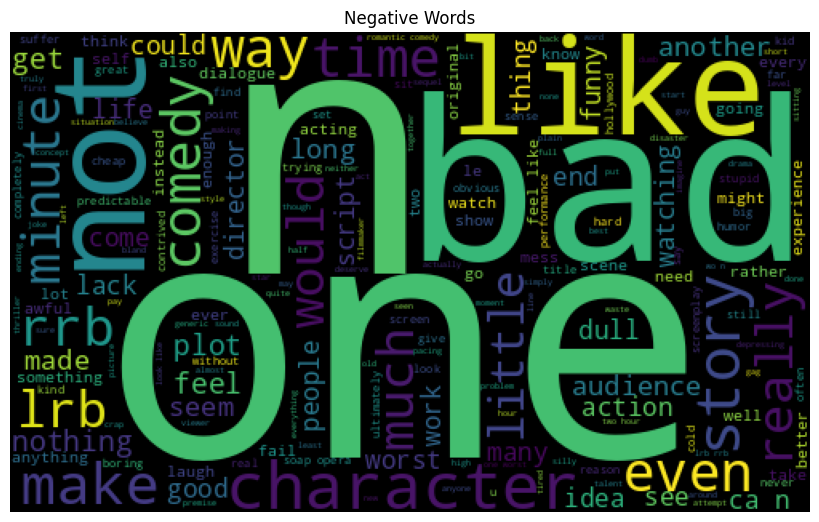

In [ ]:
from wordcloud import WordCloud

# Creating a word cloud for negative sentiment phrases
words_list =df[df['Sentiment_phrase']=='negative']['Preprocessed_phrase'].unique().tolist()
positive_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=stop_words).generate(positive_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Negative Words')
plt.show()

In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

train_df = df.copy()
y = train_df['Sentiment'].values
train_df.drop(['Sentiment'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (124848, 5) (124848,)
Test data: (31212, 5) (31212,)


In [ ]:
# Creating a Bag-of-Words (BoW) representation of the text data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_phrase_bow = vectorizer.fit_transform(X_train['Preprocessed_phrase'])
X_test_phrase_bow = vectorizer.transform(X_test['Preprocessed_phrase'])

print('X_train_phrase_bow shape: ', X_train_phrase_bow.shape)
print('X_test_phrase_bow shape: ', X_test_phrase_bow.shape)

X_train_phrase_bow shape:  (124848, 13727)
X_test_phrase_bow shape:  (31212, 13727)


In [ ]:
# Training a Naive Bayes classifier on the BoW representation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_phrase_bow, y_train)

y_pred = clf.predict(X_test_phrase_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6144431628860695


In [ ]:
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, target_names=["neutral","somewhat negative","negative","somewhat positive","positive"]))

                   precision    recall  f1-score   support

          neutral       0.47      0.30      0.36      1414
somewhat negative       0.50      0.41      0.45      5455
         negative       0.69      0.80      0.74     15916
somewhat positive       0.52      0.49      0.51      6586
         positive       0.49      0.30      0.37      1841

         accuracy                           0.61     31212
        macro avg       0.53      0.46      0.49     31212
     weighted avg       0.60      0.61      0.60     31212



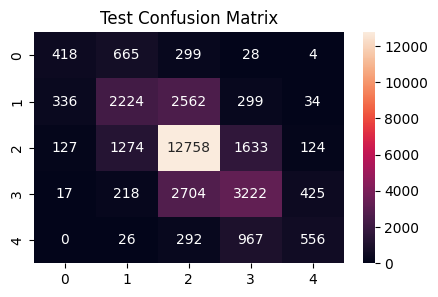

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_phrase_tfidf = vectorizer.fit_transform(X_train['Preprocessed_phrase'])
X_test_phrase_tfidf = vectorizer.transform(X_test['Preprocessed_phrase'])

print('X_train_phrase_tfidf shape: ', X_train_phrase_tfidf.shape)
print('X_test_phrase_tfidf shape: ', X_test_phrase_tfidf.shape)

X_train_phrase_tfidf shape:  (124848, 13727)
X_test_phrase_tfidf shape:  (31212, 13727)


In [ ]:
lf = MultinomialNB(alpha=1)
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.5884916057926438


In [ ]:
print(classification_report(y_test, y_pred, target_names=["neutral","somewhat negative","negative","somewhat positive","positive"]))

                   precision    recall  f1-score   support

          neutral       0.58      0.05      0.09      1414
somewhat negative       0.51      0.25      0.34      5455
         negative       0.61      0.90      0.73     15916
somewhat positive       0.53      0.39      0.45      6586
         positive       0.61      0.06      0.11      1841

         accuracy                           0.59     31212
        macro avg       0.57      0.33      0.34     31212
     weighted avg       0.57      0.59      0.53     31212



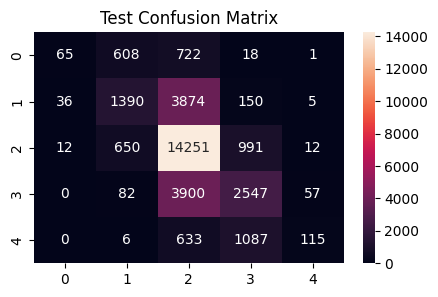

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6247597078046905


In [ ]:
print(classification_report(y_test, y_pred, target_names=["neutral","somewhat negative","negative","somewhat positive","positive"]))

                   precision    recall  f1-score   support

          neutral       0.54      0.18      0.27      1414
somewhat negative       0.51      0.35      0.41      5455
         negative       0.66      0.88      0.76     15916
somewhat positive       0.56      0.44      0.49      6586
         positive       0.59      0.25      0.35      1841

         accuracy                           0.62     31212
        macro avg       0.57      0.42      0.46     31212
     weighted avg       0.61      0.62      0.60     31212



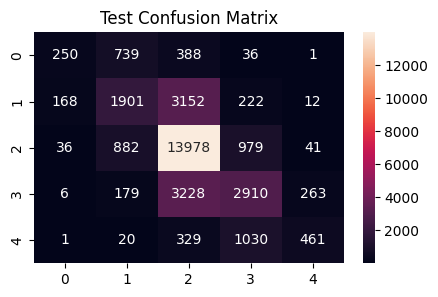

In [ ]:
# Visualizing the confusion matrix for the Logistic Regression model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()
